In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


# Import the data

In [2]:
from sklearn.model_selection import train_test_split as tts
train = pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")
test_id = test.id
train = train.set_index('id')
test = test.set_index('id')
display(train.head())
y = train['target']
X = train.drop('target', axis=1)
X_train, X_valid, y_train, y_valid = tts(X, y, test_size=0.2)

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


# Data Visualization

<AxesSubplot:xlabel='target', ylabel='calc'>

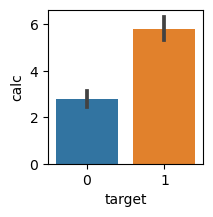

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(2, 2))
display(sns.barplot(data=train, y='calc', x='target'))

<AxesSubplot:xlabel='target', ylabel='urea'>

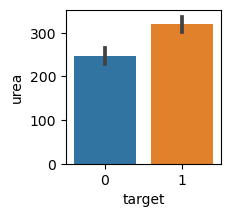

In [4]:
plt.figure(figsize=(2, 2))
display(sns.barplot(data=train, y='urea', x='target'))

<AxesSubplot:xlabel='target', ylabel='cond'>

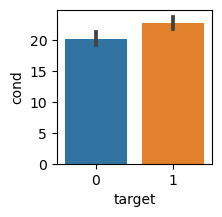

In [5]:
plt.figure(figsize=(2, 2))
display(sns.barplot(data=train, y='cond', x='target'))

<AxesSubplot:xlabel='target', ylabel='osmo'>

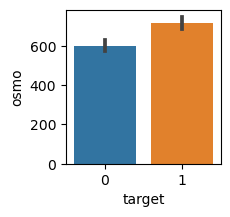

In [6]:
plt.figure(figsize=(2, 2))
display(sns.barplot(data=train, y='osmo', x='target'))

<AxesSubplot:xlabel='target', ylabel='ph'>

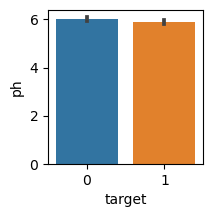

In [7]:
plt.figure(figsize=(2, 2))
display(sns.barplot(data=train, y='ph', x='target'))

# Checking for none vals

In [8]:
train.isnull().sum()
# note there aren't any categorical values either hence there is no need of preprocessing

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

# Making the model

In [9]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score
def find_acc(max_nodes, X_train=X_train, X_valid=X_valid, y_train=y_train, y_valid=y_valid):
    model = dtc(max_leaf_nodes=max_nodes)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    return acc
for nodes in [5, 10, 50, 100, 500, 1000, 5000]:
    print(f"Accuracy for {nodes} is {find_acc(nodes)}")

Accuracy for 5 is 0.7831325301204819
Accuracy for 10 is 0.6867469879518072
Accuracy for 50 is 0.6626506024096386
Accuracy for 100 is 0.6626506024096386
Accuracy for 500 is 0.6144578313253012
Accuracy for 1000 is 0.6626506024096386
Accuracy for 5000 is 0.6385542168674698


* Clearly the model is more accurate with 10 as max nodes
* Now we feed the entire training data to the model to improve accuracy

In [10]:
model = dtc(max_leaf_nodes=10)
model.fit(X, y)
vals = model.predict(test)
vals = pd.DataFrame(vals)
result = pd.merge(test_id, vals, left_index=True, right_index=True)
result.columns=['id', 'target']
result

,id,target
0,414,0
1,415,0
2,416,1
3,417,0
4,418,0
...,...,...
271,685,1
272,686,0
273,687,0
274,688,0


# Submission

In [11]:
result.to_csv("submission.csv",index=False)